# PM2.5 prediction

### Import libraries

In [1]:
import math
import os

import matplotlib.pyplot as plt
import numpy as np
from numpy.random import seed
from scipy.stats import stats
seed(1)
from fs import methods as m
import geopandas as gpd
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import tensorflow
tensorflow.random.set_seed(1)
from tensorflow.python.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score


### Data Import

2022-05-09 12:26:17.830038: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-05-09 12:26:17.830692: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 13)                169       
_________________________________________________________________
dense_1 (Dense)              (None, 392)               5488      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 393       
Total params: 6,050
Trainable params: 6,050
Non-trainable params: 0
_________________________________________________________________
---------17/10 - 23/10 (2021)---------
Train on 17 samples, validate on 5 samples
Epoch 1/30
17/17 [==============================] - 1s 55ms/sample - loss: 0.2706 - mse: 0.2706 - mae: 0.4421 - accuracy: 0.0000e+00 - val_loss: 0.0401 - val_mse: 0.0401 - val_mae: 0.1814 - val_accuracy: 0.2000
Epoch 2/30
17/17 [==============================] - 0s 4ms/s

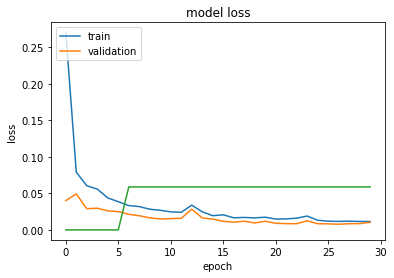

---------MODEL---------
Values predicted:  [[39.571957]
 [25.559847]
 [12.954651]
 [48.4914  ]
 [12.125205]
 [42.308914]]
Values :  [[32.57142857]
 [27.51785714]
 [13.14285714]
 [47.28571429]
 [ 9.57142857]
 [36.57142857]]
Mean Absolute Error:  3.1072823433648984
Mean Squared Error:  15.62846940727916
Mean (Y-test): 27.77678571428571
Mean (Y-predicted):  30.168663
R2 score:  0.9086576634607039
---------RESULTS WITH RESPECT THE ENTIRE DATASET---------
Mean Absolute Error:  2.233748395510037
Mean Squared Error:  9.435695072993456
Mean (Y-test): 30.890972898323348
Mean (Y-predicted):  32.826243128095356
R2 score:  0.8908894383289223
---------24/03 - 31/03 (2021)---------
Train on 17 samples, validate on 5 samples
Epoch 1/30
17/17 [==============================] - 0s 5ms/sample - loss: 0.0246 - mse: 0.0246 - mae: 0.1266 - accuracy: 0.0588 - val_loss: 0.0086 - val_mse: 0.0086 - val_mae: 0.0899 - val_accuracy: 0.2000
Epoch 2/30
17/17 [======================

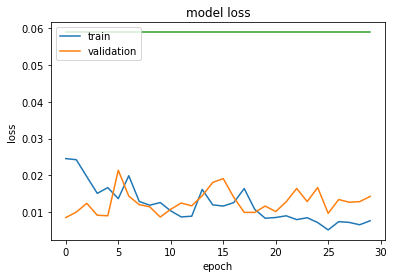

---------MODEL---------
Values predicted:  [[25.2311  ]
 [27.891338]
 [35.84317 ]
 [25.222818]
 [22.69691 ]
 [23.551388]]
Values :  [[25.75      ]
 [27.25      ]
 [35.61607143]
 [26.75      ]
 [20.        ]
 [26.5       ]]
Mean Absolute Error:  1.4266736166817797
Mean Squared Error:  3.172011952547468
Mean (Y-test): 26.977678571428573
Mean (Y-predicted):  26.739454
R2 score:  0.8479516684919521
---------RESULTS WITH RESPECT THE ENTIRE DATASET---------
Mean Absolute Error:  4.022465885605945
Mean Squared Error:  19.447801603995888
Mean (Y-test): 30.312002288876783
Mean (Y-predicted):  26.339648587363108
R2 score:  0.3939098884974218
---------17/07 - 24/07 (2021)---------
Train on 17 samples, validate on 5 samples
Epoch 1/30
17/17 [==============================] - 0s 5ms/sample - loss: 0.0228 - mse: 0.0228 - mae: 0.1316 - accuracy: 0.0588 - val_loss: 0.0219 - val_mse: 0.0219 - val_mae: 0.1247 - val_accuracy: 0.2000
Epoch 2/30
17/17 [====================

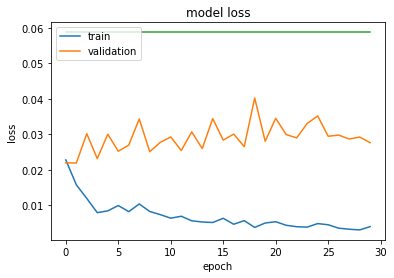

---------MODEL---------
Values predicted:  [[15.913263]
 [14.620986]
 [13.752718]
 [10.227792]
 [13.788907]
 [14.244359]]
Values :  [[17.375]
 [12.375]
 [12.375]
 [ 9.875]
 [13.875]
 [14.   ]]
Mean Absolute Error:  0.9614473978678385
Mean Squared Error:  1.5451365569794386
Mean (Y-test): 13.3125
Mean (Y-predicted):  13.758004
R2 score:  0.6996545492887347
---------RESULTS WITH RESPECT THE ENTIRE DATASET---------
Mean Absolute Error:  0.5111937754263637
Mean Squared Error:  0.3778563181992988
Mean (Y-test): 13.053267777136623
Mean (Y-predicted):  13.398981979915074
R2 score:  0.815987137376879
---------03/09 - 10/09 (2021)---------
Train on 18 samples, validate on 5 samples
Epoch 1/30
18/18 [==============================] - 0s 5ms/sample - loss: 0.0143 - mse: 0.0143 - mae: 0.0955 - accuracy: 0.1111 - val_loss: 0.0148 - val_mse: 0.0148 - val_mae: 0.1038 - val_accuracy: 0.0000e+00
Epoch 2/30
18/18 [==============================] - 0s 4ms/sample - loss: 0.01

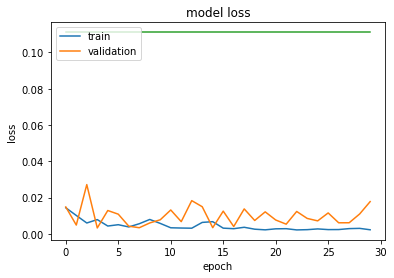

---------MODEL---------
Values predicted:  [[18.188852]
 [28.50852 ]
 [13.994214]
 [14.760985]
 [12.443707]
 [17.712164]]
Values :  [[17.        ]
 [27.875     ]
 [11.6875    ]
 [12.125     ]
 [ 8.625     ]
 [14.74107143]]
Mean Absolute Error:  2.2591453052702404
Mean Squared Error:  6.248997256738342
Mean (Y-test): 15.342261904761905
Mean (Y-predicted):  17.601408
R2 score:  0.8362770457057295
---------RESULTS WITH RESPECT THE ENTIRE DATASET---------
Mean Absolute Error:  2.0253236106801222
Mean Squared Error:  4.949519999808469
Mean (Y-test): 15.559170453827464
Mean (Y-predicted):  17.519131561805462
R2 score:  0.5807513939504902
---------18/04 - 25/04 (2021)---------
Train on 17 samples, validate on 5 samples
Epoch 1/30
17/17 [==============================] - 0s 5ms/sample - loss: 0.0171 - mse: 0.0171 - mae: 0.1026 - accuracy: 0.0588 - val_loss: 0.0203 - val_mse: 0.0203 - val_mae: 0.1216 - val_accuracy: 0.2000
Epoch 2/30
17/17 [====================

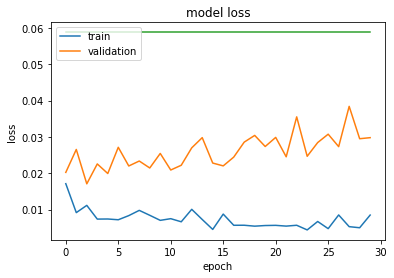

---------MODEL---------
Values predicted:  [[14.7922535]
 [13.283607 ]
 [19.773766 ]
 [16.637638 ]
 [17.113522 ]
 [22.81816  ]]
Values :  [[16.   ]
 [13.25 ]
 [21.625]
 [19.   ]
 [17.625]
 [24.625]]
Mean Absolute Error:  1.2955447832743328
Mean Squared Error:  2.332314657701166
Mean (Y-test): 18.6875
Mean (Y-predicted):  17.403158
R2 score:  0.8291311974516364
---------RESULTS WITH RESPECT THE ENTIRE DATASET---------
Mean Absolute Error:  0.5965827663984185
Mean Squared Error:  0.8032181946525744
Mean (Y-test): 18.26804829817353
Mean (Y-predicted):  17.968851259776525
R2 score:  0.9018523802574518


In [2]:
geopackages = os.listdir('grids')
geopackages.remove('.DS_Store')

TARGET = 'pm25_st'
NUMBER_OF_PARAMS = 10
NUMBER_OF_COVARIATES = NUMBER_OF_PARAMS + 2

NUMBER_OF_SAMPLES = 28

model = Sequential()
model.add(Dense(NUMBER_OF_COVARIATES+1, input_dim=NUMBER_OF_COVARIATES, kernel_initializer='normal', activation='relu'))
model.add(Dense(NUMBER_OF_SAMPLES*(NUMBER_OF_COVARIATES+2), activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

model.compile(loss='mse', optimizer='adam', metrics=['mse','mae', 'accuracy'])

for grid in geopackages:
    data = gpd.read_file('grids/'+ grid)


    data = data[~data[TARGET].isnull()]
    data = data.dropna(axis=1)


    data.pop('geometry')
    data.pop('bottom')
    data.pop('top')
    data.pop('left')
    data.pop('right')

    labels = pd.read_csv('results/grid_cams_0418_0425_2021.csv').iloc[:NUMBER_OF_PARAMS]

    #read variables which are not null
    score_results = pd.DataFrame()

    #Store dataset in x and y variables
    X = pd.DataFrame(data=data, columns=labels['Features'] ).dropna(axis = 1)
    X['lat_cen'] = data['lat_cen']
    X['lng_cen'] = data['lng_cen']

    Y = pd.DataFrame(data=data, columns=[TARGET] )
    Y = Y.values.ravel()


    #NUMBER_OF_COVARIATES = X.shape[1]
    y1 = np.array(Y)

    X_train, X_val, y_train, y_val = train_test_split(X, y1, test_size=0.20)

    y_train=np.reshape(y_train, (-1,1))
    y_val=np.reshape(y_val, (-1,1))

    scaler_x = MinMaxScaler()
    scaler_y = MinMaxScaler()

    scaler_x.fit(X_train)
    xtrain_scale=scaler_x.transform(X_train)
    scaler_x.fit(X_val)
    xval_scale=scaler_x.transform(X_val)

    scaler_y.fit(y_train)
    ytrain_scale=scaler_y.transform(y_train)
    scaler_y.fit(y_val)
    yval_scale=scaler_y.transform(y_val)
    print('---------'+ m.getTitle_gpkg(grid) +'---------')

    history=model.fit(xtrain_scale, ytrain_scale, epochs=30, batch_size=1, verbose=1, validation_split=0.20)
    predictions = model.predict(xval_scale)

    print(history.history.keys())
    # "Loss"
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.plot(history.history['accuracy'])

    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

    predictions = scaler_y.inverse_transform(predictions)

    print('---------MODEL---------')
    print('Values predicted: ', predictions)
    print('Values : ', scaler_y.inverse_transform(yval_scale))

    print('Mean Absolute Error: ',mean_absolute_error(y_val, predictions))
    print('Mean Squared Error: ',mean_squared_error(y_val, predictions))
    print('Mean (Y-test):',np.mean(y_val))
    print('Mean (Y-predicted): ',np.mean(predictions))
    print('R2 score: ',r2_score(y_val, predictions))

    #%%

    data_new = gpd.read_file('grids/'+ grid)
    data_new = data_new[~data_new[TARGET].isnull()]
    pm25_obs = data_new['pm25_int']
    X_new = pd.DataFrame(data=data_new, columns=labels['Features']).dropna(axis=1)
    X_new['lat_cen'] = data_new['lat_cen']
    X_new['lng_cen'] = data_new['lng_cen']
    scaler_x = MinMaxScaler()
    scaler_x.fit(X_new)
    X_new_scale=scaler_x.transform(X_new)




    predictions_pm25 = model.predict(X_new_scale)
    predictions_pm25 = pd.Series(np.array(scaler_y.inverse_transform(predictions_pm25)).reshape((-1,)))
    e = pd.DataFrame()

    e['predictions_pm25'] = list(predictions_pm25)
    e['pm25_obs'] = list(pm25_obs)
    e = e.dropna(axis=0)
    print('---------RESULTS WITH RESPECT THE ENTIRE DATASET---------')
    print('Mean Absolute Error: ',mean_absolute_error(e['pm25_obs'], e['predictions_pm25']))
    print('Mean Squared Error: ',mean_squared_error(e['pm25_obs'], e['predictions_pm25']))
    print('Mean (Y-test):',np.mean(e['pm25_obs']))
    print('Mean (Y-predicted): ',np.mean(e['predictions_pm25']))
    print('R2 score: ',r2_score(e['pm25_obs'], e['predictions_pm25']))